# Технологическая практика

## Работа с Pandas

In [35]:
import pandas as pd
%matplotlib inline
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [17]:
data = pd.read_csv('pima-indians-diabetes.csv')
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
758,1,106.0,76.0,NaN,NaN,37.5,0.197,26,0
759,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
767,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [4]:
data[pd.isna(data)].size

6912

__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [25]:
disck = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "Age"]
for col in disck:
    for index in data[col][pd.isna(data[col])].index:
        data[col][index] = data[col].mean()

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.000000,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.1,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.0,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.5,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,NaN,0.232,54,1


__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [26]:
rows = ["min", "max", "Mean", "dispersion", "quantiles"]
statistics = pd.DataFrame(columns=data.columns)

for col in data:
    statistics[col] = [data[col].min(), data[col].max(), data[col].mean(), np.var(data[col]), np.quantile(data[col], [0, 1])] 
statistics.index = rows
statistics.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
min,0,44,24,7,14,18.2,0.078,21,0
max,17,199,122,99,846,67.1,2.42,81,1
Mean,3.84505,121.687,72.4052,29.1534,155.548,32.4575,0.471876,33.2409,0.348958
dispersion,11.3393,925.141,146.131,77.18,7219.18,47.8921,0.109636,138.123,0.227186
quantiles,"[0, 17]","[44.0, 199.0]","[24.0, 122.0]","[7.0, 99.0]","[14.0, 846.0]","[nan, nan]","[0.078, 2.42]","[21, 81]","[0, 1]"


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [27]:
len(data["Class"][data["Age"] > 50])

81

__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [28]:
max_1 = data["Pregnancies"].max()
max_2 = data["Pregnancies"][data["Pregnancies"] != max_1].max()
max_3 = data["Pregnancies"][(data["Pregnancies"] != max_1) & (data["Pregnancies"] != max_2)].max()
print(max_1, max_2, max_3)

17 15 14


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [29]:
data["Pregnancies"][(data["Age"] >= 30) & (data["Age"] <= 30)].size

21

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?


In [30]:
data["BloodPressure"][(data["BloodPressure"] >= 80) & (data["BloodPressure"] <= 89)].size / data["BloodPressure"].size * 100

18.880208333333336

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?


In [31]:
mean = data["BloodPressure"].mean()
obesity = data[data["BMI"] >= 30]
len(obesity[obesity > mean])

472

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [32]:
# Glucose ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
Glucose = [data["Glucose"][data["Class"] == 1].mean(), data["Glucose"][data["Class"] == 0].mean()]
print(Glucose)

[142.16557285655603, 110.71012057667103]


In [33]:
# BloodPressure ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
BloodPressure = [data["BloodPressure"][data["Class"] == 1].mean(), data["BloodPressure"][data["Class"] == 0].mean()]
print(BloodPressure)

[75.1473244283358, 70.93539699863574]


In [34]:
# Insulin ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
Insulin = [data["Insulin"][data["Class"] == 1].mean(), data["Insulin"][data["Class"] == 0].mean()]
print(Insulin)

[180.4315478445337, 142.2107614213198]


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

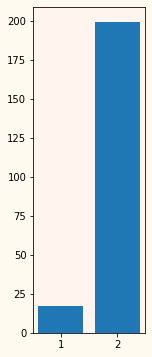

In [48]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

x = [1, 2]
y = [data["Pregnancies"].max(), data["Glucose"].max()]

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(2)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

plt.show()

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

(-1.1103917189999, 1.1004948773786571, -1.106452141145052, 1.111637571647217)

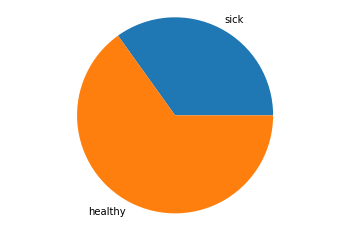

In [51]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
vals = [data["Class"][data["Class"] == 1].size / data["Class"].size,
        data["Class"][data["Class"] == 0].size / data["Class"].size]
labels = ["sick", "healthy"]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

/home/dima/botva/1semestr/technological_prackt/MLS/mls/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/dima/botva/1semestr/technological_prackt/MLS/mls/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/dima/botva/1semestr/technological_prackt/MLS/mls/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a fu

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

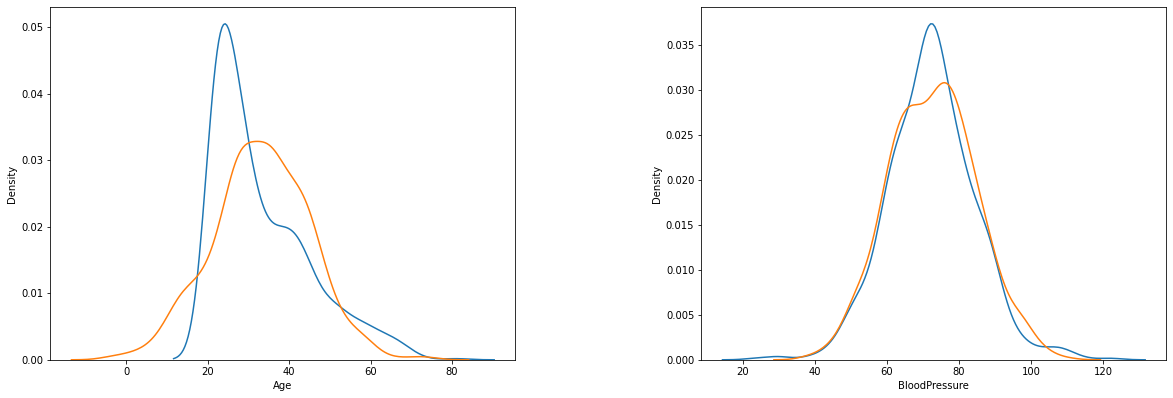

In [58]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
# plt.scatter(data["Age"], np.arange(data["Age"].size))
import seaborn as sns
x = np.random.normal(loc=data['Age'].mean(), scale=data['Age'].std(), size=len(data['Age']))
y = np.random.normal(loc=data['BloodPressure'].mean(), scale=data['BloodPressure'].std(), size=len(data['BloodPressure']))


fig, axs = plt.subplots(1, 2,figsize=(20, 5))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
sns.distplot(data['Age'], hist=False, ax=axs[0],label='распределение для признака Age')
sns.distplot(x, hist=False, ax=axs[0],label='Нормальное распределение')

sns.distplot(data['BloodPressure'], hist=False, ax=axs[1],label='распределение для признака  BloodPressure')
sns.distplot(y, hist=False, ax=axs[1],label='Нормальное распределение')

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

In [73]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pregnancies_diabetes = data["Pregnancies"][data["Class"] == 1]
p_d = dict.fromkeys(set([i[1] for i in pregnancies_diabetes.items()]), 0)
for i in pregnancies_diabetes:
    p_d[i] += 1


[6, 8, 0, 3, 2, 8, 10, 1, 5, 7, 0, 7, 1, 7, 9, 11, 10, 7, 3, 9, 2, 4, 9, 0, 7, 8, 7, 8, 7, 0, 2, 13, 0, 5, 15, 4, 1, 1, 0, 3, 8, 7, 4, 5, 0, 0, 1, 1, 0, 4, 9, 3, 10, 9, 8, 7, 17, 0, 6, 6, 6, 8, 0, 5, 7, 8, 1, 8, 5, 7, 11, 5, 3, 4, 4, 8, 5, 7, 0, 9, 12, 5, 5, 5, 0, 2, 3, 4, 6, 4, 7, 0, 9, 3, 6, 9, 12, 1, 11, 3, 4, 0, 2, 10, 7, 0, 7, 2, 1, 0, 2, 1, 2, 14, 0, 2, 5, 10, 0, 2, 2, 7, 3, 6, 3, 0, 13, 1, 2, 1, 5, 9, 7, 5, 9, 1, 13, 1, 5, 4, 6, 1, 3, 12, 4, 5, 8, 5, 5, 4, 0, 3, 4, 5, 5, 4, 8, 1, 0, 3, 4, 3, 8, 4, 1, 1, 0, 0, 8, 4, 0, 0, 2, 14, 10, 8, 2, 3, 0, 0, 4, 7, 6, 0, 12, 3, 9, 9, 4, 3, 8, 3, 10, 8, 5, 6, 0, 0, 2, 2, 0, 8, 8, 3, 11, 3, 0, 1, 7, 4, 1, 3, 7, 11, 9, 0, 7, 13, 7, 6, 1, 0, 11, 2, 3, 1, 8, 9, 6, 4, 10, 6, 9, 3, 0, 4, 1, 13, 7, 7, 3, 6, 1, 10, 9, 2, 10, 7, 3, 5, 1, 3, 8, 2, 1, 11, 9, 1, 3, 6, 4, 0, 8, 1, 0, 6, 9, 1]


__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [74]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
data["wasPregnant"] = [1 if i != 0 else 0 for i in data["Pregnancies"]]
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.000000,35.00000,155.548223,33.6,0.627,50,1,1
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0,1
2,8,183.0,64.000000,29.15342,155.548223,23.3,0.672,32,1,1
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0,1
4,0,137.0,40.000000,35.00000,168.000000,43.1,2.288,33,1,0
5,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0,1
6,3,78.0,50.000000,32.00000,88.000000,31.0,0.248,26,1,1
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0,1
8,2,197.0,70.000000,45.00000,543.000000,30.5,0.158,53,1,1
9,8,125.0,96.000000,29.15342,155.548223,NaN,0.232,54,1,1


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [76]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print(data["wasPregnant"][data["wasPregnant"] == 1].size / data["wasPregnant"].size * 100, 
     data["wasPregnant"][data["wasPregnant"] == 0].size / data["wasPregnant"].size * 100)

85.546875 14.453125


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [79]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
data["bodyType"] = ["Underweight" if i <= 18.5 else "Normal weight" if i > 18.5 and i < 24.9
                    else "Normal weight" if i > 25 and i < 29.9 else "Obesity" for i in data["BMI"]]
data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.000000,35.00000,155.548223,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0,1,Normal weight
2,8,183.0,64.000000,29.15342,155.548223,23.3,0.672,32,1,1,Normal weight
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0,1,Normal weight
4,0,137.0,40.000000,35.00000,168.000000,43.1,2.288,33,1,0,Obesity
5,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0,1,Normal weight
6,3,78.0,50.000000,32.00000,88.000000,31.0,0.248,26,1,1,Obesity
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0,1,Obesity
8,2,197.0,70.000000,45.00000,543.000000,30.5,0.158,53,1,1,Obesity
9,8,125.0,96.000000,29.15342,155.548223,NaN,0.232,54,1,1,Obesity


__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [88]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
data[(data["BloodPressure"] > 80) & (data["BloodPressure"] < 89)
                   & (data["bodyType"] == "Normal weight") & (data["Class"] == 1)].size / data.size * 100

0.6510416666666667